In [ ]:
!pip install nsepy

In [ ]:
!pip install fastai

In [3]:
from nsepy import get_history
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
inp = input("type code: ")

data = get_history(symbol=inp, start=date(2015,1,1), end=date(2020,1,31))
data.to_csv("data.csv")
df = pd.read_csv("data.csv")
df.head()

type code: HDFC


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,HDFC,EQ,1135.90,1130.0,1131.15,1120.10,1125.90,1124.00,1124.23,401576,4.514650e+13,11804,128793,0.3207
1,2015-01-02,HDFC,EQ,1124.00,1127.3,1176.95,1125.35,1171.05,1171.90,1159.93,2019816,2.342845e+14,59071,1258847,0.6232
2,2015-01-05,HDFC,EQ,1171.90,1168.8,1175.00,1150.40,1154.95,1156.40,1159.24,2219458,2.572880e+14,57749,1414720,0.6374
3,2015-01-06,HDFC,EQ,1156.40,1148.6,1148.60,1096.10,1098.00,1101.95,1117.84,2531748,2.830100e+14,81436,1547523,0.6112
4,2015-01-07,HDFC,EQ,1101.95,1097.5,1114.15,1095.00,1097.65,1099.25,1105.58,2406880,2.660992e+14,133109,1533304,0.6371


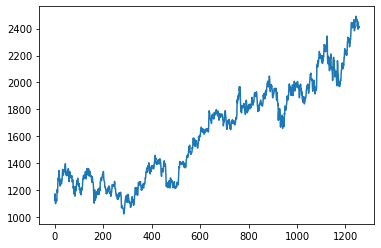

In [5]:
df1 = df.reset_index()['Close']
plt.plot(df1)

In [65]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

data = df.sort_index(ascending=True, axis=0)

new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [66]:
from fastai.tabular.core import add_datepart
add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)

In [67]:
train = new_data[:900]
valid = new_data[900:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [68]:
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

154.3808738607781

In [69]:
dat = valid['Close']
check = pd.DataFrame(dat)
check['pred'] = preds

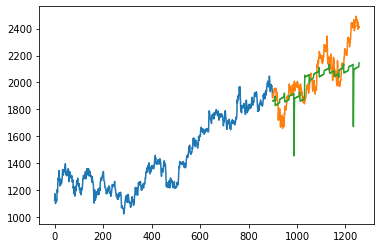

In [70]:
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(check['pred'])